This Notebook will show the co-occurrence matrices that indicate how stable is the co-occurrence between two expressed elements within the ensemble of 3D models. For this, all-vs-all pairwise distances matrices will be calculated in each model (between expressed elements) and hierarchically clustered using Ward’s sum of squares method. Then the Calinski-Harabasz index will be used to determinate the optimal number of clusters in each dendrogram. Finally, a co-occurrence matrix will be generated considering the percentage of models in which a pair of particles belong to the same cluster. From this co-occurrence matrix we will substract the active elements communities by combining again clustering using Ward’s sum of squares and the Calinski-Harabasz index.

NOTE: For this notebook you need some additional files inside of "additionalInput" folder:  
-expressionData.txt contains information about expression chip or other measures whose location will be compared in the plots  
Format: Name Chromosome Coordinate Cell1 Cell2, Cell3, ...  
Example: Gene Chr TSS Ery nCD4 Mon  
Each cell column informs about the expression value of the gene stated in the row for that cell

# Parameters to modify 

In [1]:
# Maximum number of models to be used. From ~1500 done, we will keep the best 1000
modelsKeep = 1000
# Base path where the folder branch is stored
basePath = '/home/julen/TADdyn/SparseDataModelling/'
# Define the orther of the cells for the ploting
orderCell = ['Ery', 'nCD4', 'Mon']
# Define the coloring options for each cell
colors = [(120/255., 94/255., 240/255.), 
          (254/255., 97/255., 0/255.),
          (220/255., 38/255., 127/255.)
         ]
# Wether to store figures in pdf or not
saveFig = True
# In which of the model clusters we will do the analysis
cluster = 1

# Optinal file with information about expression chip or other measures whose 
# location will be shown in the plots
# Format: Name Chromosome Coordinate Cell1 Cell2, Cell3, ...
# Example: Gene Chr TSS Ery nCD4 Mon  # Each Cell column has the expression value
# Of that cell in the gene that names the row
signalData = basePath + 'additionalInput/expressionData.txt'
# The signal threshold associated to this files (if none leave it as None which
# will define 0 by default)
# Allowed lowest value is 0
threshold = 0

# Range of number of clusters in which to look for the optimal clustering
clusterRange=(2,10)

# minimum and maximum values vor the coloring of expression in the 
# cooccurrence matrix borders
colorRange = (0, 5)


# Libraries and functions 

In [1]:
import sys
import cPickle as pickle
from matplotlib import pyplot as plt
import warnings

# Run 

## Define new paths 

In [3]:
# Output path for pickles and plots
outdata = basePath + 'outData/modelAnalysis/model_comparisons/coOccurrenceMatrix/'
outplot = basePath + 'outPlot/modelAnalysis/model_comparisons/coOccurrenceMatrix/'

# create folders
! mkdir -p {outdata}
! mkdir -p {outplot}

## Import additional libraries 

In [4]:
sys.path.append(basePath + 'code')
import fileHandling
import plotting
import metrics

## Compute co-occurrence matrices

This code will load the model files and region data

In [5]:
## Path were the models are stored
cells, regionsAll, models = fileHandling.getModelsPaths(basePath, ending='models')

## get regions
regiones = {}
# get info of the regions
for cell in cells:
    for regi in regionsAll:
        if not regi in regiones:
            
            regiones[regi] = fileHandling.getREgiInfo(basePath, regi, cell)
        else:
            infot = fileHandling.getREgiInfo(basePath, regi, cell)
            if infot != regiones[regi]:
                print('Region %s, cell %s has different parameters than previous cells')
                print('This code is not prepared to compare models with different length \
                      or resolution')

## Retrieve clustering data 

In [6]:
# If we ran this script with less models, will recover the previous clustering info
clustersPickle= basePath + 'outData/modelAnalysis/clustering/allClusterDict.pickle' 
with open(clustersPickle, "rb") as input_file:
    allClusters = pickle.load(input_file)
print('Recovering previous clustering data from:')
print(clustersPickle)

Recovering previous clustering data from:
/home/julen/TADdyn/SparseDataModelling/outData/modelAnalysis/clustering/allClusterDict.pickle


This code will load expression data and gene positions

In [7]:
newSignalPos, newSignal = fileHandling.getSignalAndPos(regiones, orderCell, 
                                                       signalData, signalThreshold=0)

In this code we will compute the per-model distances between the expressed elements

In [8]:
distancesPerModel = metrics.getBetweenBinDist2(regionsAll, models, newSignalPos, modelsKeep,
                      allClusters, cluster)

In this code we will calculate the final co-occurrence matrix and the number of clusters we define in each model

In [9]:
# we will hide some warnings taht appear in this part
with warnings.catch_warnings():
    warnings.simplefilter('ignore')
    definedClusters, coOcurrMatrices, posConverter = metrics.getCooccurrenceMatrices(regionsAll, models, 
                                                                       distancesPerModel,
                                                               newSignalPos, 
                                                               clusterRange=clusterRange)

This code will store the co-occurrence matrix

In [10]:
# Store distance data in pickle
with open(outdata + "DistancesCooccurrence.pickle", "wb") as output_file:
    pickle.dump([definedClusters, coOcurrMatrices, posConverter], output_file)
    

If you dont want to run all, you can load our results from here

In the next code we will visualize the distribution of automatically defined to number of clusters in the different model ensembles.  

NOTE: It is important to check that the number of automatically assigned clusters doesn't always show the maximum or minimum values. If so, it might mean that there are only two clear clusters (first case), or that there might be more clusters than we thought and so we need to increase "clusterRange" (second case).

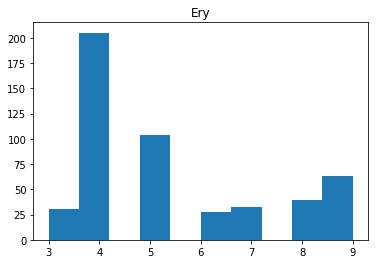

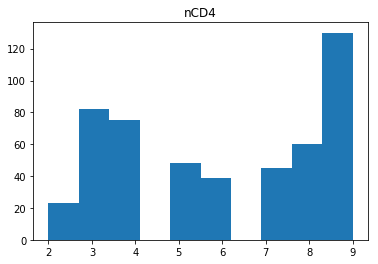

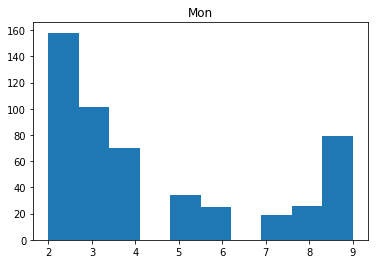

In [11]:
for regi in regionsAll:
    for cell in orderCell:
        plt.hist(definedClusters[regi][cell])
        plt.title(cell)
        plt.show()


In the next code we will visualise the co-occurrence matrices

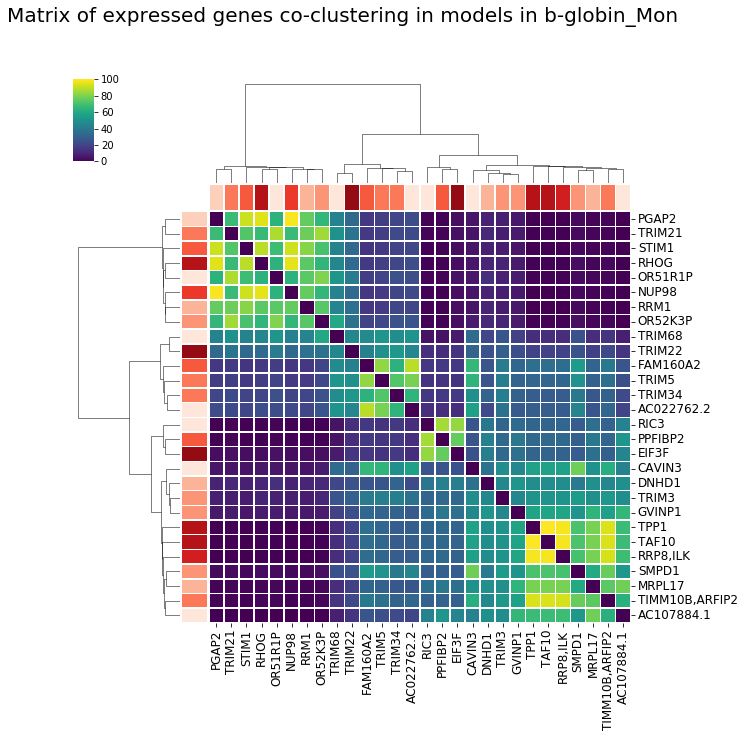

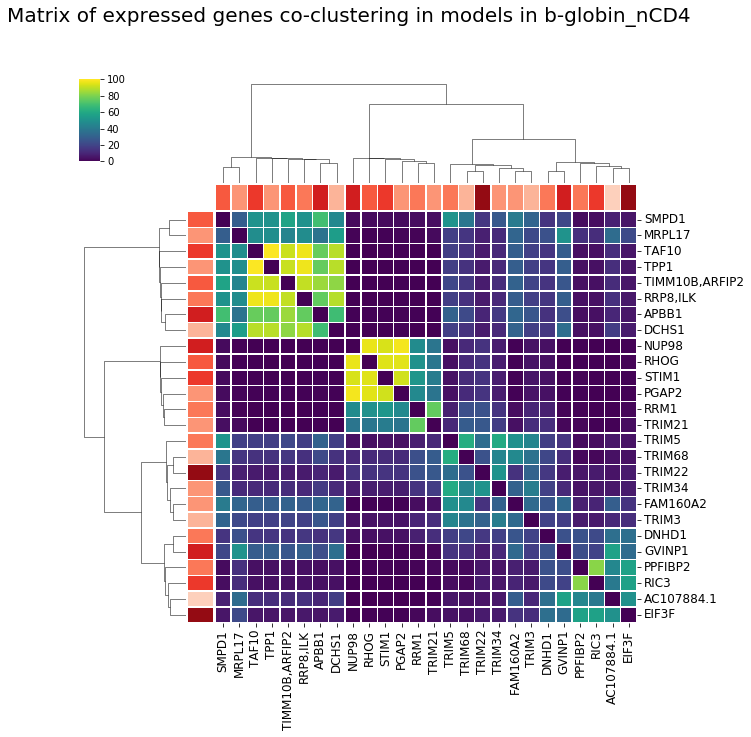

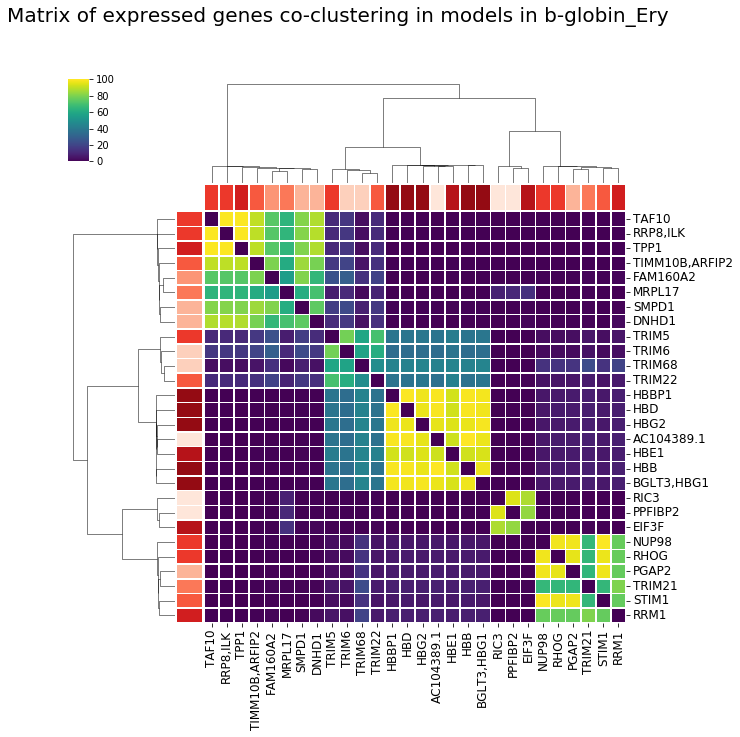

In [12]:
plotting.getCoOccurrencePlot(coOcurrMatrices, colorRange[0], colorRange[1], cluster,
                       newSignalPos, posConverter, newSignal, saveFig, outplot)


The following code will display the gene IDs located in each of the defined final communities

In [13]:
clustersBinPos, clusterGeneNames = metrics.getClusterPositions(coOcurrMatrices, posConverter,
                        newSignalPos, toshow=True)

############################## b-globin ##############################
:::::::::: Mon ::::::::::
_____ 1 _____
NUP98
PGAP2
RHOG
STIM1
RRM1
TRIM21
OR51R1P
OR52K3P
_____ 2 _____
TRIM68
TRIM34
TRIM5
TRIM22
AC022762.2
FAM160A2
CAVIN3
SMPD1
TRIM3
TIMM10B
ARFIP2
DNHD1
RRP8
ILK
TAF10
TPP1
MRPL17
GVINP1
AC107884.1
PPFIBP2
EIF3F
RIC3
:::::::::: nCD4 ::::::::::
_____ 1 _____
SMPD1
APBB1
TIMM10B
ARFIP2
RRP8
ILK
TAF10
TPP1
DCHS1
MRPL17
_____ 2 _____
NUP98
PGAP2
RHOG
STIM1
RRM1
TRIM21
_____ 3 _____
TRIM68
TRIM34
TRIM5
TRIM22
FAM160A2
TRIM3
DNHD1
GVINP1
AC107884.1
PPFIBP2
EIF3F
RIC3
:::::::::: Ery ::::::::::
_____ 1 _____
FAM160A2
SMPD1
TIMM10B
ARFIP2
DNHD1
RRP8
ILK
TAF10
TPP1
MRPL17
_____ 2 _____
TRIM68
AC104389.1
HBB
HBD
HBBP1
BGLT3
HBG1
HBG2
HBE1
TRIM6
TRIM5
TRIM22
_____ 3 _____
PPFIBP2
EIF3F
RIC3
_____ 4 _____
NUP98
PGAP2
RHOG
STIM1
RRM1
TRIM21


The next code will store the locations and IDs of the genes belonging to each community

In [14]:
with open(outdata + 'coOccurrenceClusters', 'wb') as handle:
    pickle.dump([clustersBinPos, clusterGeneNames], handle, protocol=pickle.HIGHEST_PROTOCOL)